<a href="https://colab.research.google.com/github/fernanvilla/UNALTECOCO-2020-01/blob/master/Tecoco_Clase%2004_01_AutomataUnidimencional_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos Deterministas y No Deterministas

## Noción de Algoritmos Deterministas y No Deterministas



En un sentido tradicional, un algoritmo es determinista si al conocer las entradas del algoritmo siempre producirá la misma salida, y la máquina interna pasará por la misma secuencia de estados. Mientras que para un algoritmo no determinista con la misma entrada ofrece diversos resultados y por tanto no ofrece una solución única. Lo cual se evidencia en el siguiente grafico(Eleschinski, 2000)

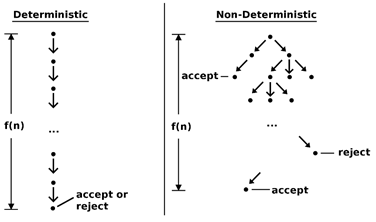

## Nociones de Autómatas Unidimensionales

Los autómatas celulares (AC) son sistemas computacionales abstractos discretos que han sido útiles tanto como modelos generales de complejidad como representaciones más específicas de dinámicas no lineales. Son aplicados en una gran variedad de campos científicos, como:

* Analizadores sintácticos y semánticos
* Motores de cómputo
* Simuladores de sistemas de cómputo discretos
* Modelos conceptuales para estudiar la formación de patrones y la complejidad
* Como modelos originales de física fundamental.
* Representación Fractal

Lectura Recomendada:  https://plato.stanford.edu/entries/cellular-automata/ 

Los AC son habitualmente espaciales y temporalmente discretos. Están compuestos por un conjunto finito o numerable de unidades simples y homogéneas, tradicionalmente llamados átomos, células o celdas. En cada unidad de tiempo, PASO n, las celdas crean una instancia de un conjunto finito de estados. 

Los AC Evolucionan en paralelo en pasos de tiempo discretos, siguiendo las funciones de actualización de estado o reglas de transición dinámicas. La actualización de un estado de celda se obtiene tomando en cuenta los estados de las celdas en su vecindario local; ¡entonces, no hay acciones a distancia!

Los AC son abstractos, es decir, pueden especificarse en términos puramente matemáticos e implementarse en estructuras físicas. 

Además, los AC son sistemas computacionales, considerando que pueden calcular funciones y resolver problemas algorítmicos. 

Los AC con reglas adecuadas puede emular una máquina universal de Turing y procesar, cualquier cosa computable. Para más detalles de Máquinas de Turing consultar:      https://en.wikipedia.org/wiki/Turing_machine


## Bases para la implementación de un Autómata Celular UNIDIMENSIONAL

Todo Autómata tienelos siguientes componentes:

### Primero, Estado Inicial y Diccionario de Símbolos

Estado Inicial, también conocido como clase inicial: es una lista que representa el estado inicial del sistema de n celdas (átomos o células) en esta Lista Verdadero es 1 (^) y Falso es 0 (_), en este caso el diccionario de símbolos es ( _ , ^ ). A continuación, se presentan 32 celdas [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0, **1** ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]; entonces, la representación obtenida es (cada uno se reemplaza con ^ y cada cero con _), esto es a gusto del programador.

Por ejemplo, en una impresión.

imagen.png
 
    


### Segundo, La regla de transformación.

La regla de transformación: El estado de la celda actual es Verdadero (^)  si y sólo si el estado de la celda izquierda o derecha del renglón  anterior es Verdadero (^) nunca ambos, en otro caso el estado de la celda es Falso (_).

Por ejemplo, en un sistema de 3 células o celdas, 
* `010 produce 101 , es decir, _^_ produce ^_^`
* `100 produce 010 , es decir, ^__ produce _^_`
* `001 produce 010 , es decir, __^ produce _^_`
* `011 produce 111 , es decir, _^^ produce ^^^`
* `111 produce 101 , es decir, ^^^ produce ^_^`

Por ejemplo, en una impresión (las líneas negras se pintaron manuelament con paint, con el fin de ilustrar mejor el ejemplo):

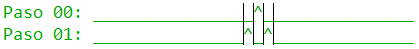

Esta regla es conocida como la 'Hat Rule', para más detallesobre esta regla consultar https://plato.stanford.edu/entries/cellular-automata/ 
    
Existen otras reglas famosas:
* https://en.wikipedia.org/wiki/Rule_110 
* https://en.wikipedia.org/wiki/Rule_30 
* https://en.wikipedia.org/wiki/Rule_90 
    
La siguiente es la evolución de la 'Hat Rule' en cada paso, con base en el patrón inicial. Este es el patrón evolutivo resultante de la regla.

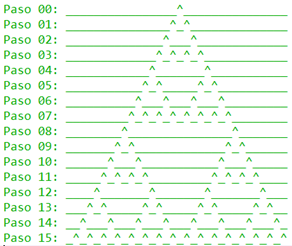


## Implementación del Autómata Unidimencional en Python

In [ ]:
def automata_celular():
    # Nótese que en el patrón inicial solo hay un Verdadero en la posición 17
    sistema = [ 0,0,0,0,0,0,0,0,0,0, 
            0,0,0,0,0,0,1,0,0,0,
            0,0,0,0,0,0,0,0,0,0, 0,0]
    
    # Diccionariocionario para mapear los valores de las celdas a símbolos
    diccionario = {0:'_', 1:'^'}

    # Se imprime la primera línea, o paso = 0
    # Nótese como en una sola línea se usa el diccionario aplicado al sistema:
    #       diccionario[e] for e in sistema_nuevo
    # Luego entre [] se arma esta lista así:
    #       [diccionario[e] for e in sistema_nuevo]
    # Con el método join se concatenan los elementos de la lista
    #       ''.join([])
    #       '' esto evita crear una variable para acceder a los métodos de tipo texto (str)

    print('Paso 00', ''.join( [diccionario[e] for e in sistema]))
    
    # Ahora los siguientes 15 pasos. Ver que paso es menor que 16
    paso = 1
    while(paso < 16):
        sistema_nuevo = []

        # Se itera entre la posición 0 y la 32 y almacena el estado de la 
        # celda actual en la lista de sistema_nuevo
        for i in range(0,32):
            # Para la celda correspondiente, verifica el estado de los vecinos            
            if i > 0 and i < 31:
                if sistema[i-1] == sistema[i+1]:
                    sistema_nuevo.append(0)
                else:
                    sistema_nuevo.append(1)

            # Para el caso del primer elemento
            elif(i == 0):
                if sistema[1] == 1:
                    sistema_nuevo.append(1)
                else:
                    sistema_nuevo.append(0)

            # Para el caso del último elemento
            elif(i == 31):
                if sistema[30] == 1:
                    sistema_nuevo.append(1)
                else:
                    sistema_nuevo.append(0)


        # Se actualizan los estados del sistema
        # [:] tomar todos los elementos de la lista, sin esto funciona igual
        sistema = sistema_nuevo[:]
        
        
        # Se imprime el estado actualizado del sistema
        print  ('Paso',str(paso).zfill(2),''.join( [diccionario[e] for e in sistema]))

        # incrementa el paso o iterador
        paso += 1

In [ ]:
# Ejecutamos el Autómata
automata_celular()

Paso 00 ________________^_______________
Paso 01 _______________^_^______________
Paso 02 ______________^___^_____________
Paso 03 _____________^_^_^_^____________
Paso 04 ____________^_______^___________
Paso 05 ___________^_^_____^_^__________
Paso 06 __________^___^___^___^_________
Paso 07 _________^_^_^_^_^_^_^_^________
Paso 08 ________^_______________^_______
Paso 09 _______^_^_____________^_^______
Paso 10 ______^___^___________^___^_____
Paso 11 _____^_^_^_^_________^_^_^_^____
Paso 12 ____^_______^_______^_______^___
Paso 13 ___^_^_____^_^_____^_^_____^_^__
Paso 14 __^___^___^___^___^___^___^___^_
Paso 15 _^_^_^_^_^_^_^_^_^_^_^_^_^_^_^_^


## Tareas
A continuación, los requisitos del ejercicio, la tarea se puede resolver en pareja, por favor una vez finalizada registrarla en el formulario google.

### Parte 1: Algoritmos Determinísticos 


1.	Analizar, comprender y ejecutar el código del Autómata Unidimensional. (Ver sección, Implementación del Autómataa Unidimencional en Python)

2.	En la Siguiente Celda de Código. Cree e implemente otro método, 
`def automata_celular_param(SisIni, cFalso, cVerdadero)`
donde `SisIni` es el listado inicial del sistema, es decir, se le puede pasar por parámetro una lista de n posiciones; `cVerdadero` es el carácter que va a reemplazar cuando en el patrón se encuentre un valor verdadero; mientras que,  `cFalso` el carácter cuando sea falso.

**Por ejemplo**: una llamada con una lista de 80 células, con un 1 en diferentes posiciones; con punto (.) cuando es falso y asterisco (*) cuando es verdadero.

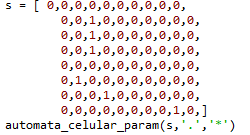

Impresión de parte del resultado:

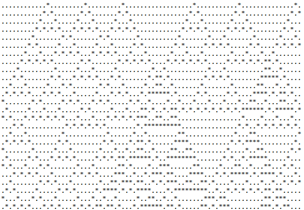
 
Obvious Tip: necesitarás `n = len(lista)` obtiene la cantidad de elementos de la lista.


In [ ]:
# Desarrolla acá la solución de la PARTE 1.





#Recuerda usar esta celda para tu implementación. USA mas celdas si lo consideras necesario.

### Parte 2: Algoritmos NO Determinísticos

* Ahora el objetivo es crear un autómata unidimensional no determinístico (habitualmente se usan para encriptar). Para esto tomando como base el determinístico resuelto de la Parte 1.

* Primero implemente, documente (agregar comentarios explicando) y pruebe dos reglas adicionales (puede ser de las “famosas” u otras que usted ingenie), con estas dos reglas ahora tendrá 3 reglas, 'Hat Rule' más las dos que usted implemente. 

* Luego, en cada iteración o paso, la selección de cada una regla debe ser aleatoria. Para cada iteración se debe imprimir cual fue el conjunto de reglas aplicado. Por ejemplo, i es el estado inicial y las x son la modificación de aplicar una regla seleccionada aleatoriamente en cada iteracción.

```
Paso 00 iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii
Paso 01 xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  'Hat Rule'
Paso 02 xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  'Rule 30'
Paso 04 xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  'Hat Rule'
Paso 05 xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  'Hat Rule'
Paso 06 xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  'Rule 30'
Paso 07 xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  'Rule 110'
```

* Un método útil para generar el número aleatorio para la selección de la regla.

```
# Ejemplo de generación de aleatorio entero
from random import randint

# Se genera un aleatorio entero entre 0 y 2 (0, 1 o 2)
seleccion = randint(0,2)
print(seleccion)

if (seleccion == 0):
  #Aplicar regla xx
elif (seleccion == 1):
  #Aplicar regla yy
else:
  #Aplicar regla zz
```


In [ ]:
# Realiza la implementación de esta parte acá.







#Recuerda usar esta celda para tu implementación. USA mas celdas si lo consideras necesario.